<a href="https://colab.research.google.com/github/vKrish14/Machine-Learning-in-90-days/blob/master/hyperparameter_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BREAST CANCER DATA EDA AND HYPER-PARAMETER TUNING

In this notebook I have used breast cancer data which is already available.
Then i have performed some EDA and then i have divided the data into train and test split, then SMOTE to training data only, then train model using regression and K-Folds cross validation.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from collections import Counter


In [ ]:
# 1. Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target

print("Original Class Distribution:", Counter(y))  # Check for imbalance

Original Class Distribution: Counter({np.int64(1): 357, np.int64(0): 212})


Target Class Distribution: Counter({np.int64(1): 357, np.int64(0): 212})


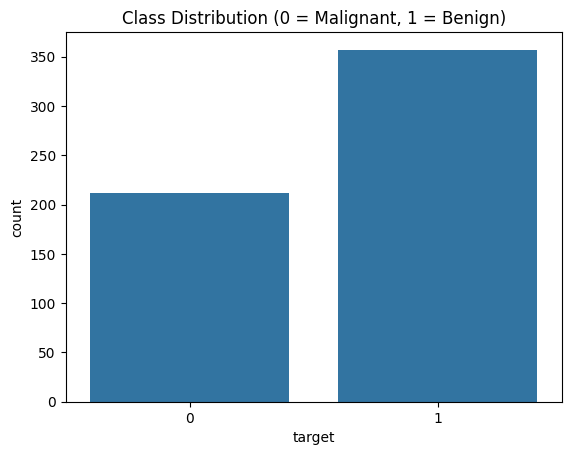

In [ ]:
# 2. Convert to Pandas DataFrame for easier analysis
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# 3. Class Distribution
print("Target Class Distribution:", Counter(y))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0 = Malignant, 1 = Benign)')
plt.show()

In [ ]:
# 4. Basic Info
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [ ]:
# 5. Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
# 6. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe().T)


Descriptive Statistics:
                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.75700

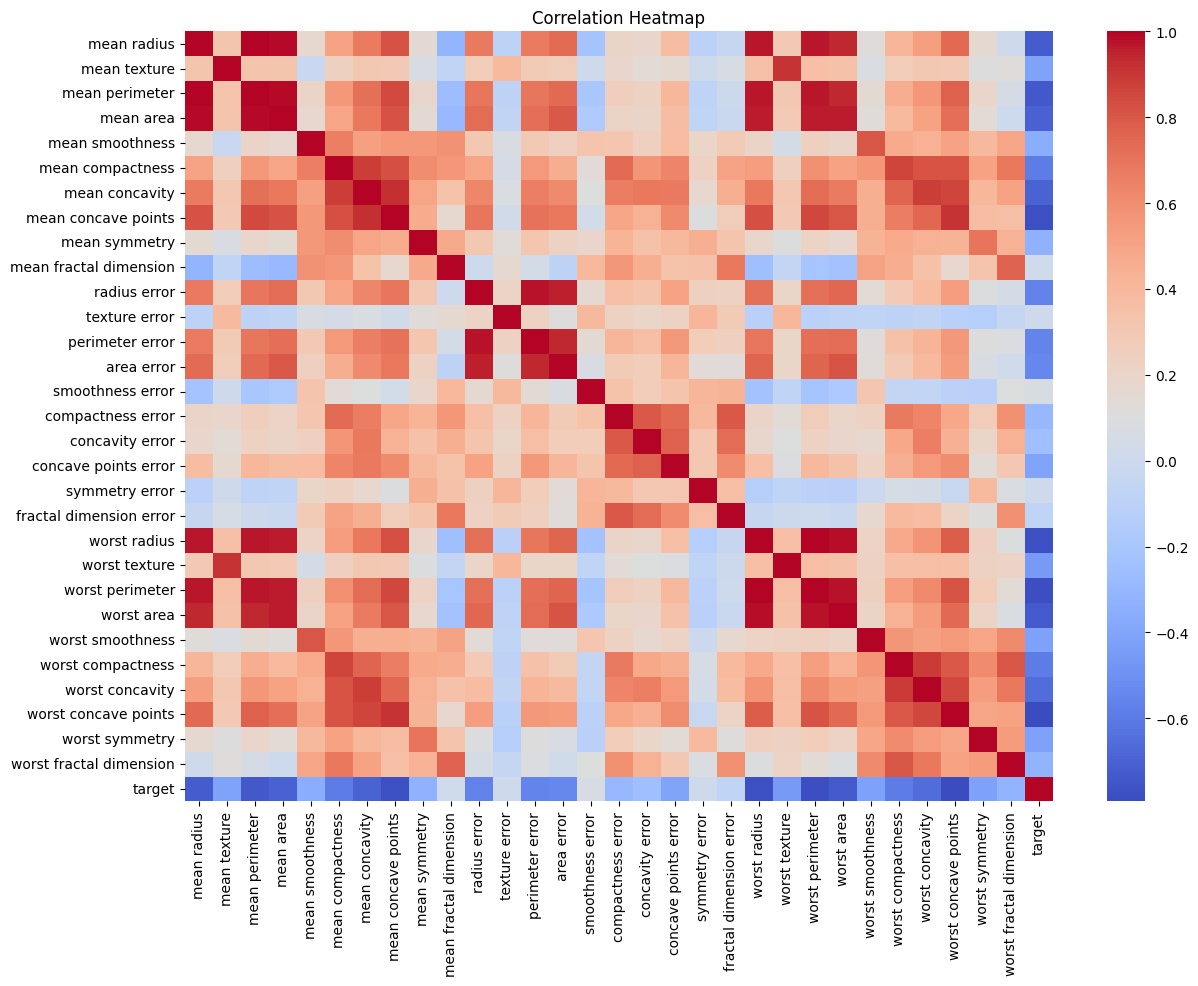

In [ ]:
# 7. Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 3. Apply SMOTE to Training Data ONLY
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE on training set:", Counter(y_train_sm))

After SMOTE on training set: Counter({np.int64(1): 285, np.int64(0): 285})


In [ ]:
# 4. Build Logistic Regression Model
lr = LogisticRegression(solver='liblinear')

In [ ]:
# 5. GridSearchCV with Cross-Validation (K-Fold)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [ ]:
# Using StratifiedKFold for balanced splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    lr, param_grid, cv=cv, scoring='accuracy', verbose=1
)
grid_search.fit(X_train_sm, y_train_sm)

print("\nBest Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Parameters: {'C': 10, 'penalty': 'l1'}


In [ ]:
# 6. Evaluate Best Model on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Confusion Matrix:
 [[41  1]
 [ 3 69]]


In [ ]:
# 7. Cross-Validation Score on Resampled Data
cv_scores = cross_val_score(best_model, X_train_sm, y_train_sm, cv=cv)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.98245614 0.95614035 0.97368421 0.97368421 0.94736842]
Mean CV Accuracy: 0.9666666666666668
